# Imports

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.activations import relu

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

from requests import get

# Preparing

In [ ]:
%pip install pickle5

     |████████████████████████████████| 256 kB 5.3 MB/s 


In [ ]:
tokenizer_py = get('https://github.com/tikovka72/' +
                   'movies-recommendations/raw/main/tokenizer.py')
tokenizer_pickle = get('https://github.com/tikovka72/' + 
                       'movies-recommendations/raw/main/tokenizer.pickle')

with open('tokenizer.py', 'wb') as f: 
    f.write(tokenizer_py.content.replace(b' pickle', b' pickle5'))
    print('tokenizer.py downloaded')

with open('tokenizer.pickle', 'wb') as f: 
    f.write(tokenizer_pickle.content)
    print('tokenizer.pickle downloaded')

tokenizer.py downloaded
tokenizer.pickle downloaded


# Constants

In [ ]:
INPUT_SHAPE = 8000
HIDDEN_LAYER_SHAPE = 256

# Generator

In [ ]:
def create_generator(): 
    input_layer = Input(INPUT_SHAPE)
    layer = Dense(4096, activation=relu)(input_layer)
    for units_count in [2048, 2048, 1024, 512, 512, HIDDEN_LAYER_SHAPE]: 
        layer = Dense(units_count, activation=relu)(layer)
    return Model(input_layer, layer)

# Decoder

In [ ]:
def create_decoder(): 
    input_layer = Input(HIDDEN_LAYER_SHAPE)
    layer = Dense(512, activation=relu)(input_layer)
    for units_count in [512, 512, 1024, 2048, 2048, 4096, INPUT_SHAPE]:
        layer = Dense(units_count, activation=relu)(layer)
    return Model(input_layer, layer)

# Whole model

In [ ]:
main_input = Input(INPUT_SHAPE)
generator, decoder = create_generator(), create_decoder()
model = Model(main_input, decoder(generator(main_input)))

# Data formatting

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com' + 
                 '/tikovka72/movies-recommendations/main/csv/movies.csv')

In [ ]:
keywords = df['keywords'].dropna()

In [ ]:
from tokenizer import CustomTokenizer

t = CustomTokenizer()

In [ ]:
np.save('/content/drive/MyDrive/movies-recommendations/vecotors_decoded.npy', all_x)

In [ ]:
all_x = np.array([t.get_binary_indexes(t.cut_words(keyword)) for keyword in keywords])

# Data getting

In [ ]:
all_x = np.load('/content/drive/MyDrive/movies-recommendations/vecotors_decoded.npy')

In [ ]:
all_x = all_x / all_x.max()

In [ ]:
x_train, x_test = train_test_split(all_x, train_size=.85, random_state=123)

In [ ]:
x_train.shape

(3728, 8000)

# Fitting

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics='accuracy')

In [ ]:
history = model.fit(x_train, x_train, epochs=100, batch_size=8, validation_split=0.1)

Epoch 1/100
420/420 [==============================] - 19s 43ms/step - loss: 9.7406e-04 - accuracy: 0.0602 - val_loss: 0.0010 - val_accuracy: 0.0724
Epoch 2/100
420/420 [==============================] - 18s 42ms/step - loss: 9.7331e-04 - accuracy: 0.0644 - val_loss: 0.0010 - val_accuracy: 0.0617
Epoch 3/100
420/420 [==============================] - 18s 42ms/step - loss: 9.7321e-04 - accuracy: 0.0626 - val_loss: 0.0010 - val_accuracy: 0.0670
Epoch 4/100
420/420 [==============================] - 18s 42ms/step - loss: 9.7322e-04 - accuracy: 0.0531 - val_loss: 0.0010 - val_accuracy: 0.0670
Epoch 5/100
420/420 [==============================] - 18s 43ms/step - loss: 9.7317e-04 - accuracy: 0.0626 - val_loss: 0.0010 - val_accuracy: 0.0724
Epoch 6/100
420/420 [==============================] - 18s 42ms/step - loss: 9.7322e-04 - accuracy: 0.0635 - val_loss: 0.0010 - val_accuracy: 0.0724
Epoch 7/100
420/420 [==============================] - 18s 43ms/step - loss: 9.7320e-04 - accuracy: 0.0653

In [ ]:
history.history

{'accuracy': [0.06020864471793175,
  0.06438151746988297,
  0.06259314715862274,
  0.05305514112114906,
  0.06259314715862274,
  0.06348733603954315,
  0.06527570635080338,
  0.06348733603954315,
  0.06199701875448227,
  0.06915052235126495,
  0.06557376682758331,
  0.05842026695609093,
  0.06348733603954315,
  0.06020864471793175,
  0.06110282987356186,
  0.06259314715862274,
  0.06169895827770233,
  0.06378539651632309,
  0.06527570635080338,
  0.06169895827770233,
  0.05782414227724075,
  0.06348733603954315,
  0.06527570635080338,
  0.06646795570850372,
  0.06408345699310303,
  0.0646795853972435,
  0.06378539651632309,
  0.06020864471793175,
  0.05931445583701134,
  0.06587183475494385,
  0.06378539651632309,
  0.06110282987356186,
  0.06497764587402344,
  0.06408345699310303,
  0.06348733603954315,
  0.062295082956552505,
  0.06378539651632309,
  0.06497764587402344,
  0.06020864471793175,
  0.06438151746988297,
  0.06169895827770233,
  0.06080476939678192,
  0.062295082956552505

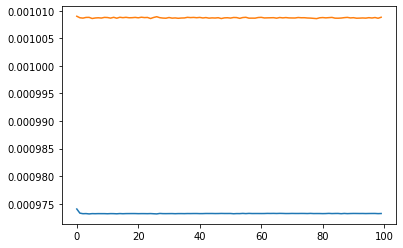

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0, 100, 1), history.history['loss'])
plt.plot(np.arange(0, 100, 1), history.history['val_loss'])